In [27]:
import graphlab
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''
Read files into dataframes.
File "jokes.dat" contains all jokes ordered by id.
File "ratings.dat" has 3 columns: user_id, joke_id, and the corresponding rating.
'''
df_jokes = pd.read_table('data/jokes.dat', names=['jokes'])
df_ratings = pd.read_table('data/ratings.dat')

In [6]:
df_jokes.head()

,jokes
0,1:
1,<p>
2,"A man visits the doctor. The doctor says, &quo..."
3,<br />
4,"The man replies, &quot;Well, thank God I don&#..."


In [4]:
df_ratings.head()

,user_id,joke_id,rating
0,34888,111,-9.71875
1,49651,119,4.75000
2,29027,137,2.62500
3,25235,30,-2.43750
4,50499,19,2.18750


In [9]:
print df_jokes.iloc[2]

jokes    A man visits the doctor. The doctor says, &quo...
Name: 2, dtype: object


In [7]:
print df_jokes.shape
print df_ratings.shape

(1277, 1)
(1218325, 3)


In [13]:
'''
The jokes table is not in a good format and contains unwanted signs and texts.
Write a function to clean up the table.
'''
i = 1
jokes = []
joke = []
for line in df_jokes['jokes'].values:
    if str(i) + ':' == line:
        i += 1
        jokes.append(joke)
        joke = []
    else:
        joke.append(line)
        
jokes.append(joke)  
jokes = jokes[1:]

In [15]:
print len(jokes)
print jokes[0]

150
['<p>', 'A man visits the doctor. The doctor says, &quot;I have bad news for you. You have cancer and Alzheimer&#039;s disease&quot;.<br />', '<br />', 'The man replies, &quot;Well, thank God I don&#039;t have cancer!&quot;', '</p>']


In [17]:
'''
Still, there are some html tags in the texts.
Take them out with BeautifulSoup.
'''
cleanjokeslist = []
for joke in jokes:
    soup = BeautifulSoup(''.join(joke), 'html.parser')
    cleanjokeslist.append(soup.text)

In [18]:
#joke id = cleanjokestable index + 1 
cleanjokeslist[0] #this is the first joke

u'A man visits the doctor. The doctor says, "I have bad news for you. You have cancer and Alzheimer\'s disease".The man replies, "Well, thank God I don\'t have cancer!"'

In [19]:
'''
Store our ratings data in Dato's SFrame type. 
'''
sf = graphlab.SFrame(df_ratings[['user_id', 'joke_id', 'rating']])

In [20]:
sf

user_id,joke_id,rating
34888,111,-9.71875
49651,119,4.75
29027,137,2.625
25235,30,-2.4375
50499,19,2.1875
7300,51,9.3125
30219,9,2.3125
29443,134,3.1875
27069,128,1.21875
24450,120,10.0


In [21]:
sf.shape

(1218325, 3)

In [26]:
'''
Create a matrix factorization model.
Tune the model to find the best parameters.
Find best parameters by rmse.
'''
lmbdas = [0, 1e-16, 1e-14, 1e-12, 1e-10]
rmses = []
for lmbda in lmbdas:
    rating_recommender = graphlab.recommender.factorization_recommender.create(
        sf, 
        user_id = 'user_id', 
        item_id = 'joke_id', 
        target = 'rating', 
        solver = 'als', 
        regularization = lmbda)
    rmses.append(rating_recommender.get('training_rmse'))

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1218325 observations with 50692 users and 141 items.

Data prepared in: 1.75387s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 0        |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 104us        | NA                     |

+---------+--------------+------------------------+

| 0       | 878.916ms    | 4.04515                |

| 1       | 1.85s        | 3.27963                |

| 2       | 2.86s        | 3.16455                |

| 3       | 3.72s        | 3.11044                |

| 4       | 4.53s        | 3.07688                |

| 5       | 5.72s        | 3.05631                |

| 6       | 6.99s        | 3.04346                |

| 7       | 8.26s        | 3.03492                |

| 8       | 9.31s        | 3.02884                |

| 9       | 10.28s       | 3.02424                |

| 10      | 11.14s       | 3.02058                |

| 11      | 12.00s       | 3.01754                |

| 12      | 12.83s       | 3.01494                |

| 13      | 13.76s       | 3.01265                |

| 14      | 14.60s       | 3.01061                |

| 15      | 15.45s       | 3.00877                |

| 16      | 16.37s       | 3.00712                |

| 17      | 17.24s       | 3.00565                |

| 18      | 18.13s       | 3.00433                |

| 19      | 19.40s       | 3.00314                |

| 20      | 20.55s       | 3.00206                |

| 21      | 21.43s       | 3.00107                |

| 22      | 22.63s       | 3.00017                |

| 23      | 23.84s       | 2.99933                |

| 24      | 24.80s       | 2.99855                |

| 25      | 25.63s       | 2.99783                |

| 26      | 26.46s       | 2.99715                |

| 27      | 27.27s       | 2.99652                |

| 28      | 28.09s       | 2.99592                |

| 29      | 28.93s       | 2.99535                |

| 30      | 29.77s       | 2.99482                |

| 31      | 30.57s       | 2.99432                |

| 32      | 31.38s       | 2.99384                |

| 33      | 32.21s       | 2.99338                |

| 34      | 33.32s       | 2.99295                |

| 35      | 34.19s       | 2.99253                |

| 36      | 35.18s       | 2.99213                |

| 37      | 36.39s       | 2.99175                |

| 38      | 37.56s       | 2.99137                |

| 39      | 38.43s       | 2.99101                |

| 40      | 39.23s       | 2.99066                |

| 41      | 40.03s       | 2.99032                |

| 42      | 40.83s       | 2.98999                |

| 43      | 41.67s       | 2.98966                |

| 44      | 42.46s       | 2.98934                |

| 45      | 43.24s       | 2.98902                |

| 46      | 44.35s       | 2.98871                |

| 47      | 45.50s       | 2.9884                 |

| 48      | 46.38s       | 2.98809                |

| 49      | 47.27s       | 2.98779                |

| FINAL   | 47.27s       | 2.98779                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1218325 observations with 50692 users and 141 items.

Data prepared in: 1.61869s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-16    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 103us        | NA                     |

+---------+--------------+------------------------+

| 0       | 856.279ms    | 4.04524                |

| 1       | 1.69s        | 3.27972                |

| 2       | 2.51s        | 3.16461                |

| 3       | 3.40s        | 3.11051                |

| 4       | 4.26s        | 3.07695                |

| 5       | 5.48s        | 3.05637                |

| 6       | 6.51s        | 3.0435                 |

| 7       | 7.44s        | 3.03495                |

| 8       | 8.39s        | 3.02886                |

| 9       | 9.32s        | 3.02426                |

| 10      | 10.22s       | 3.0206                 |

| 11      | 11.32s       | 3.01756                |

| 12      | 12.35s       | 3.01496                |

| 13      | 13.38s       | 3.01267                |

| 14      | 14.35s       | 3.01062                |

| 15      | 15.38s       | 3.00878                |

| 16      | 16.31s       | 3.00713                |

| 17      | 17.21s       | 3.00566                |

| 18      | 18.19s       | 3.00433                |

| 19      | 19.18s       | 3.00314                |

| 20      | 20.23s       | 3.00207                |

| 21      | 21.23s       | 3.00108                |

| 22      | 22.08s       | 3.00017                |

| 23      | 22.92s       | 2.99934                |

| 24      | 23.86s       | 2.99856                |

| 25      | 24.79s       | 2.99783                |

| 26      | 25.73s       | 2.99716                |

| 27      | 26.58s       | 2.99652                |

| 28      | 27.55s       | 2.99592                |

| 29      | 28.54s       | 2.99536                |

| 30      | 29.38s       | 2.99483                |

| 31      | 30.20s       | 2.99432                |

| 32      | 31.04s       | 2.99385                |

| 33      | 31.91s       | 2.99339                |

| 34      | 32.77s       | 2.99295                |

| 35      | 33.68s       | 2.99254                |

| 36      | 34.53s       | 2.99214                |

| 37      | 35.41s       | 2.99176                |

| 38      | 36.27s       | 2.99139                |

| 39      | 37.11s       | 2.99103                |

| 40      | 37.91s       | 2.99068                |

| 41      | 38.71s       | 2.99034                |

| 42      | 39.54s       | 2.99001                |

| 43      | 40.35s       | 2.98968                |

| 44      | 41.17s       | 2.98936                |

| 45      | 41.99s       | 2.98905                |

| 46      | 42.80s       | 2.98874                |

| 47      | 43.75s       | 2.98843                |

| 48      | 44.56s       | 2.98812                |

| 49      | 45.41s       | 2.98781                |

| FINAL   | 45.41s       | 2.98781                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1218325 observations with 50692 users and 141 items.

Data prepared in: 1.50444s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 85us         | NA                     |

+---------+--------------+------------------------+

| 0       | 858.061ms    | 4.04515                |

| 1       | 1.68s        | 3.27963                |

| 2       | 2.48s        | 3.16455                |

| 3       | 3.34s        | 3.11044                |

| 4       | 4.15s        | 3.07688                |

| 5       | 4.98s        | 3.05631                |

| 6       | 5.81s        | 3.04346                |

| 7       | 6.92s        | 3.03492                |

| 8       | 7.89s        | 3.02884                |

| 9       | 9.03s        | 3.02424                |

| 10      | 10.05s       | 3.02058                |

| 11      | 10.87s       | 3.01754                |

| 12      | 11.69s       | 3.01494                |

| 13      | 12.56s       | 3.01265                |

| 14      | 13.40s       | 3.01061                |

| 15      | 14.34s       | 3.00877                |

| 16      | 15.36s       | 3.00712                |

| 17      | 16.35s       | 3.00565                |

| 18      | 17.25s       | 3.00433                |

| 19      | 18.19s       | 3.00314                |

| 20      | 19.02s       | 3.00206                |

| 21      | 19.88s       | 3.00107                |

| 22      | 20.77s       | 3.00017                |

| 23      | 21.62s       | 2.99933                |

| 24      | 22.45s       | 2.99855                |

| 25      | 23.39s       | 2.99783                |

| 26      | 24.55s       | 2.99715                |

| 27      | 25.60s       | 2.99652                |

| 28      | 26.54s       | 2.99592                |

| 29      | 27.34s       | 2.99535                |

| 30      | 28.11s       | 2.99482                |

| 31      | 28.89s       | 2.99432                |

| 32      | 29.67s       | 2.99384                |

| 33      | 30.47s       | 2.99338                |

| 34      | 31.27s       | 2.99295                |

| 35      | 32.06s       | 2.99253                |

| 36      | 32.83s       | 2.99213                |

| 37      | 33.62s       | 2.99175                |

| 38      | 34.39s       | 2.99137                |

| 39      | 35.18s       | 2.99101                |

| 40      | 35.96s       | 2.99066                |

| 41      | 36.76s       | 2.99032                |

| 42      | 37.57s       | 2.98999                |

| 43      | 38.37s       | 2.98966                |

| 44      | 39.16s       | 2.98934                |

| 45      | 39.92s       | 2.98902                |

| 46      | 40.71s       | 2.98871                |

| 47      | 41.49s       | 2.9884                 |

| 48      | 42.27s       | 2.98809                |

| 49      | 43.06s       | 2.98779                |

| FINAL   | 43.06s       | 2.98779                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1218325 observations with 50692 users and 141 items.

Data prepared in: 1.44482s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-12    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 88us         | NA                     |

+---------+--------------+------------------------+

| 0       | 825.456ms    | 4.04527                |

| 1       | 1.60s        | 3.27501                |

| 2       | 2.39s        | 3.16252                |

| 3       | 3.18s        | 3.10925                |

| 4       | 3.97s        | 3.07646                |

| 5       | 4.78s        | 3.05647                |

| 6       | 5.55s        | 3.04395                |

| 7       | 6.34s        | 3.03555                |

| 8       | 7.14s        | 3.02951                |

| 9       | 7.93s        | 3.02491                |

| 10      | 8.71s        | 3.02121                |

| 11      | 9.49s        | 3.01813                |

| 12      | 10.27s       | 3.01548                |

| 13      | 11.06s       | 3.01313                |

| 14      | 11.85s       | 3.01104                |

| 15      | 12.63s       | 3.00916                |

| 16      | 13.42s       | 3.00747                |

| 17      | 14.20s       | 3.00597                |

| 18      | 14.99s       | 3.00462                |

| 19      | 15.79s       | 3.00341                |

| 20      | 16.58s       | 3.00231                |

| 21      | 17.35s       | 3.00131                |

| 22      | 18.16s       | 3.00039                |

| 23      | 19.09s       | 2.99953                |

| 24      | 19.99s       | 2.99874                |

| 25      | 20.80s       | 2.99801                |

| 26      | 21.68s       | 2.99732                |

| 27      | 22.50s       | 2.99667                |

| 28      | 23.28s       | 2.99607                |

| 29      | 24.06s       | 2.9955                 |

| 30      | 24.85s       | 2.99495                |

| 31      | 25.63s       | 2.99444                |

| 32      | 26.43s       | 2.99396                |

| 33      | 27.23s       | 2.99349                |

| 34      | 28.01s       | 2.99305                |

| 35      | 28.79s       | 2.99262                |

| 36      | 29.58s       | 2.99221                |

| 37      | 30.38s       | 2.99182                |

| 38      | 31.16s       | 2.99144                |

| 39      | 31.94s       | 2.99107                |

| 40      | 32.72s       | 2.99071                |

| 41      | 33.49s       | 2.99035                |

| 42      | 34.28s       | 2.99001                |

| 43      | 35.07s       | 2.98967                |

| 44      | 35.87s       | 2.98933                |

| 45      | 36.66s       | 2.989                  |

| 46      | 37.45s       | 2.98867                |

| 47      | 38.24s       | 2.98835                |

| 48      | 39.03s       | 2.98803                |

| 49      | 39.81s       | 2.98772                |

| FINAL   | 39.81s       | 2.98772                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1218325 observations with 50692 users and 141 items.

Data prepared in: 1.45033s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-10    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 80us         | NA                     |

+---------+--------------+------------------------+

| 0       | 825.502ms    | 4.25558                |

| 1       | 1.62s        | 3.20689                |

| 2       | 2.41s        | 3.12633                |

| 3       | 3.20s        | 3.08606                |

| 4       | 3.99s        | 3.06354                |

| 5       | 4.79s        | 3.04981                |

| 6       | 5.58s        | 3.04052                |

| 7       | 6.37s        | 3.03372                |

| 8       | 7.17s        | 3.02849                |

| 9       | 7.96s        | 3.02428                |

| 10      | 8.77s        | 3.02079                |

| 11      | 9.57s        | 3.01782                |

| 12      | 10.35s       | 3.01523                |

| 13      | 11.14s       | 3.01297                |

| 14      | 11.92s       | 3.01097                |

| 15      | 12.70s       | 3.0092                 |

| 16      | 13.51s       | 3.00763                |

| 17      | 14.31s       | 3.00621                |

| 18      | 15.09s       | 3.00494                |

| 19      | 15.88s       | 3.00378                |

| 20      | 16.67s       | 3.00272                |

| 21      | 17.47s       | 3.00175                |

| 22      | 18.24s       | 3.00086                |

| 23      | 19.02s       | 3.00004                |

| 24      | 19.81s       | 2.99927                |

| 25      | 20.57s       | 2.99856                |

| 26      | 21.36s       | 2.9979                 |

| 27      | 22.15s       | 2.99728                |

| 28      | 22.92s       | 2.99669                |

| 29      | 23.71s       | 2.99614                |

| 30      | 24.50s       | 2.99562                |

| 31      | 25.48s       | 2.99512                |

| 32      | 26.48s       | 2.99465                |

| 33      | 27.28s       | 2.99421                |

| 34      | 28.18s       | 2.99378                |

| 35      | 28.96s       | 2.99338                |

| 36      | 29.75s       | 2.99299                |

| 37      | 30.55s       | 2.99261                |

| 38      | 31.35s       | 2.99226                |

| 39      | 32.14s       | 2.99191                |

| 40      | 32.94s       | 2.99158                |

| 41      | 33.75s       | 2.99126                |

| 42      | 34.54s       | 2.99095                |

| 43      | 35.35s       | 2.99064                |

| 44      | 36.15s       | 2.99035                |

| 45      | 36.96s       | 2.99006                |

| 46      | 37.73s       | 2.98979                |

| 47      | 38.50s       | 2.98951                |

| 48      | 39.33s       | 2.98925                |

| 49      | 40.12s       | 2.98898                |

| FINAL   | 40.12s       | 2.98898                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [24]:
rmses #best regularization parameter at lambda = 1e-12

[2.9879381876201645,
 2.9879383694996497,
 2.9877853963073755,
 2.9877232997494882,
 2.9890093885971334]

In [31]:
rating_recommender2 = graphlab.recommender.factorization_recommender.create(
    sf, 
    user_id = 'user_id', 
    item_id = 'joke_id', 
    target = 'rating', 
    solver = 'sgd', 
    regularization = 1e-12)

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1218325 observations with 50692 users and 141 items.

Data prepared in: 1.86218s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-12    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 152290 / 1218325 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | No Decrease (225.05 >= 27.9304)          |

| 1       | 6.25              | No Decrease (195.413 >= 27.9304)         |

| 2       | 1.5625            | No Decrease (205.977 >= 27.9304)         |

| 3       | 0.390625          | No Decrease (111.462 >= 27.9304)         |

| 4       | 0.0976562         | 20.1478                                  |

| 5       | 0.0488281         | 9.03515                                  |

| 6       | 0.0244141         | 2.92023                                  |

| 7       | 0.012207          | 9.95081                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 2.92023                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 137us        | 27.9389           | 5.28573               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 329.835ms    | 21.7601           | 4.66446               | 0.0244141   |

| 2       | 601.731ms    | 17.9081           | 4.23172               | 0.0145167   |

| 3       | 982.912ms    | 15.7356           | 3.96679               | 0.0107102   |

| 4       | 1.30s        | 14.4317           | 3.7989                | 0.00863167  |

| 5       | 1.66s        | 13.535            | 3.67899               | 0.00730151  |

| 6       | 1.92s        | 12.9162           | 3.59392               | 0.00636835  |

| 10      | 3.01s        | 11.4316           | 3.38106               | 0.0043415   |

| 11      | 3.36s        | 11.1724           | 3.34251               | 0.00404199  |

| 15      | 4.46s        | 10.5237           | 3.24402               | 0.00320311  |

| 20      | 5.80s        | 10.1434           | 3.18487               | 0.00258147  |

| 25      | 7.01s        | 9.87055           | 3.14174               | 0.00218366  |

| 30      | 8.23s        | 9.60706           | 3.09952               | 0.00160155  |

| 35      | 9.49s        | 9.40571           | 3.06687               | 0.00100883  |

| 40      | 10.65s       | 9.33511           | 3.05534               | 0.000912688 |

| 45      | 11.85s       | 9.19317           | 3.03202               | 0.000496805 |

| 50      | 13.01s       | 9.12995           | 3.02158               | 0.000272958 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 9.10924

Final training RMSE: 3.01815

In [32]:
print 'rmse with solver = als:', rmses[3]
print 'rmse with solver = sgd:', rating_recommender2.get('training_rmse')
#als is the better solver

rmse with solver = als: 2.98772322845
rmse with solver = sgd: 3.01814843306


In [36]:
'''
Add in feature information as side data to improve our model.
Use whether or not a joke has question mark in it as the feature under the hypothesis that 
joke with a question has a dramatic effect which may increase the ratings.
Make a dummy column "joke_has_qmark" with values 1 and 0.
Then transform it to SFrame to use it as side data.
'''
joke_has_qmark = []
for joke in df_ratings['joke_id']:
    if joke == 151 or '?' in cleanjokeslist[joke - 1]:
        joke_has_qmark.append(1)
    else:
        joke_has_qmark.append(0)

In [37]:
print len(joke_has_qmark)
print joke_has_qmark[:10]

1218325
[0, 1, 0, 1, 1, 1, 0, 1, 1, 1]


In [38]:
feature_matrix = pd.DataFrame(df_ratings['joke_id'])
feature_matrix['joke_has_qmark'] = joke_has_qmark
feature_matrix.head()

,joke_id,joke_has_qmark
0,111,0
1,119,1
2,137,0
3,30,1
4,19,1


In [39]:
feature_matrix.shape

(1218325, 2)

In [40]:
sf_feature_matrix = graphlab.SFrame(feature_matrix[['joke_id', 'joke_has_qmark']])
sf_feature_matrix

joke_id,joke_has_qmark
111,0
119,1
137,0
30,1
19,1
51,1
9,0
134,1
128,1
120,1


In [41]:
rating_recommender3 = graphlab.recommender.factorization_recommender.create(
    sf, 
    user_id = 'user_id', 
    item_id = 'joke_id', 
    target = 'rating', 
    solver = 'als', 
    item_data = sf_feature_matrix, 
    regularization = 1e-12)

Recsys training: model = factorization_recommender

Warning: This solver currently does not support side features. Proceeding with training without side features.

Preparing data set.

Data has 1218325 observations with 50692 users and 141 items.

Data prepared in: 1.79444s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-12    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 94us         | NA                     |

+---------+--------------+------------------------+

| 0       | 884.014ms    | 4.04517                |

| 1       | 1.80s        | 3.27493                |

| 2       | 2.85s        | 3.16247                |

| 3       | 3.86s        | 3.10918                |

| 4       | 4.72s        | 3.07639                |

| 5       | 5.52s        | 3.05642                |

| 6       | 6.33s        | 3.04391                |

| 7       | 7.15s        | 3.03552                |

| 8       | 7.96s        | 3.02949                |

| 9       | 8.89s        | 3.02489                |

| 10      | 9.83s        | 3.0212                 |

| 11      | 10.65s       | 3.01812                |

| 12      | 11.44s       | 3.01546                |

| 13      | 12.24s       | 3.01312                |

| 14      | 13.07s       | 3.01103                |

| 15      | 13.87s       | 3.00915                |

| 16      | 14.68s       | 3.00746                |

| 17      | 15.51s       | 3.00596                |

| 18      | 16.31s       | 3.00461                |

| 19      | 17.12s       | 3.0034                 |

| 20      | 17.94s       | 3.00231                |

| 21      | 18.75s       | 3.0013                 |

| 22      | 19.55s       | 3.00038                |

| 23      | 20.39s       | 2.99953                |

| 24      | 21.21s       | 2.99874                |

| 25      | 22.06s       | 2.99801                |

| 26      | 22.86s       | 2.99732                |

| 27      | 23.66s       | 2.99667                |

| 28      | 24.50s       | 2.99607                |

| 29      | 25.32s       | 2.9955                 |

| 30      | 26.12s       | 2.99495                |

| 31      | 26.93s       | 2.99444                |

| 32      | 28.05s       | 2.99395                |

| 33      | 29.42s       | 2.99349                |

| 34      | 30.47s       | 2.99305                |

| 35      | 31.36s       | 2.99262                |

| 36      | 32.17s       | 2.99221                |

| 37      | 33.19s       | 2.99182                |

| 38      | 34.05s       | 2.99144                |

| 39      | 35.19s       | 2.99106                |

| 40      | 36.34s       | 2.9907                 |

| 41      | 37.44s       | 2.99035                |

| 42      | 38.67s       | 2.99                   |

| 43      | 39.77s       | 2.98966                |

| 44      | 40.71s       | 2.98932                |

| 45      | 41.98s       | 2.98899                |

| 46      | 43.15s       | 2.98866                |

| 47      | 44.24s       | 2.98834                |

| 48      | 45.08s       | 2.98802                |

| 49      | 45.85s       | 2.98772                |

| FINAL   | 45.85s       | 2.98772                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [42]:
print 'rmse original:', rmses[3]
print 'rmse with feature included:', rating_recommender3.get('training_rmse')
#after adding in feature information, we obtain the best model so far!

rmse original: 2.98772322845
rmse with feature included: 2.98771636502


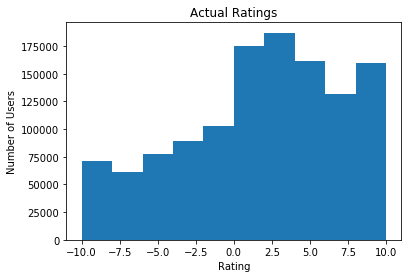

In [50]:
'''
Use our model to get the predicted ratings.
Plot the distribution of actual ratings and predicted ratings.
'''
plt.hist(df_ratings['rating'])
plt.title('Actual Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Users')

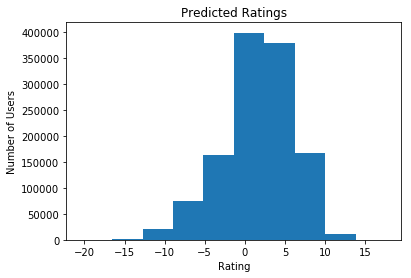

In [51]:
sf_for_predict = graphlab.SFrame(df_ratings[['user_id', 'joke_id']])
plt.hist(rating_recommender3.predict(sf_for_predict))
plt.title('Predicted Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
#predicted ratings are more normally distributed!